# BME 202, Fall 2019: Problem set 02 - Sleep Data Analysis 

## Due 23:59, Thursday, 26-September

#### Please note: I am giving you **more time than usual** to complete this problem set so that you have plenty of time to review all tutorials. DO NOT postpone starting until the last minute!

**General Instructions:**  You should complete this homework in your small groups; please name the file with: "PS02_ + first initial + last name_" for each group member (e.g., "PS02_nnibras_jtreweek.IPYNB".  For record-keeping purposes, each group member must submit an IPYNB file of the same filename through Blackboard Assignments.  Please list all group member names at the top of the assignment.  While the actual content should be identical among members of the same group, each person should summarize every group member's relative contribution to the assignment (a few sentences total - this may be done as a group or individually).  This contribution block should appear at the very end of the IPYNB file in a separate markdown cell.

**Formatting guidelines:**  Regarding python notebooks, every block of code or written
explanation of a single idea should be in a separate cell.  Code should be commented appropriately, and markdown cells must be formatted neatly in Latex.  When applicable, figures/graphs should have a title, x-label, y-label, scale, legend and/or caption.  If there is any question as to what is being displayed, explain in words to clarify.  Include both a watermark cell and the author contribution cell (discussed above) at the end of the notebook.

<br/>

### t02 Problem 1. Exploring fish sleep data, 20 pts 

In the journal club and data analysis tutorials of this week, we have been studying the neural and genetic bases of sleep, using zebrafish as a model organism.  You even started to analyze some real sleep data from zebrafish while learning how to create tidy datasets and plot these data.  In this problem, you will work with your group to come up with some good ways to parametrize sleep behavior and estimate the values of these parameters.

Choose two different ways to parametrize sleep behavior.  You can use sleep metrics from puiblished work (i.e., the [Prober, et al. paper](https://doi.org/10.1523/JNEUROSCI.4332-06.2006), from the JC club paper [Oikonomou, et al. paper](https://doi.org/10.1016/j.neuron.2019.05.038)) or you can invent your own (obviously, creativity/originality will be rewarded in the grade).  For each of the ways of parametrizing sleep, provide instructive plots and estimate the values of the parameters.  Be sure to discuss the rationale behind choosing your parametrizations.

Note that there is a lot of debate among the community of scientists studying sleep how to best quantify the behavior. This is generally true in studies of behavior, and much of the process of understanding the measurements is deciding on what to use as metrics.  This problem obviously has no right answer.  What is important is that you can provide a clear rational for your choices.

As you work through this problem, much of what you will do is exploratory data analysis.  You will work with data frames to compute the behavioral metrics of interest and make instructive plots. Again, this problem is intentionally open-ended.  You are taking a data set and making plots that you might put in a presentation or in a paper to describe the behavior.  As you do the analysis, provide text that justifies your choice (i.e., of which analyses are relevant) and discuss the conclusions (about zebrafish sleep) that can be drawn from your analyses.

You can use the resampled data set that we generated in Tutorial t02, or you can use the original data set.  If you rename the data set, *you must specify which data you are using as a starting point in your submitted IPYNB file*.

# Problem Set #2: Sleep Data Analysis
#### Members: Kevin Low, Lim Jian Loong Jethro

We used the unmodified, original data set "130315_1A_aanat2.csv" for our manipulation and later parametrization.

In [1]:
# First, import the necessary packages we will be using
import numpy as np
import pandas as pd
import itertools

import altair as alt
import altair_catplot as altcat

In [2]:
# Call the data and put into the pandas df
df = pd.read_csv('C:/Users/kevin/BME202/t02/130315_1A_aanat2.csv', comment = '#')

# Load the genoytpe file as df_gt for later use
df_gt = pd.read_csv('C:/Users/kevin/BME202/t02/fish_genotypes.txt',
                   delimiter = '\t',
                    comment = '#',
                    header = [0,1]
                   )

In [3]:
# Resets the colums to be on the 2nd level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

#Set the column names as the names of the genotypes
df_gt.columns = ['wt', 'het', 'mut']

In [4]:
# Tidy up the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Drop the rows that have a NaN in them
df_gt = df_gt.dropna()

# Reset index to account for the dropped rows
df_gt = df_gt.reset_index(drop=True)

# Change the fish numbers to int data types
df_gt.loc[:,'location'] = df_gt.loc[:,'location'].astype(int)

# Merge the genotype data and activity data int one
df = pd.merge(df, df_gt)

In [5]:
# changing data type of time column values to time
df['time'] = pd.to_datetime(df['time'])

# determines the light condition of data point based on time
df['light'] = ( (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time <= pd.to_datetime('23:00:00').time())
              )

# Viewing the compiled and tidied data set
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [6]:
# Creates a boolean list that records whether a fish is asleep or not based on the sleep definition (1 minute of no activity)
sleep = df['activity'] == 0

# New collumn that marks whether the fish is asleep for that particular minute
df['asleep'] = sleep

# Removed activity column from the data set, as it is unnecessary data.
df_sleep = df.drop(columns = ['activity'])

df_sleep.head()

,location,time,zeit,zeit_ind,day,genotype,light,asleep
0,1,2013-03-15 18:31:09,-14.480833,-869,4,het,True,False
1,1,2013-03-15 18:32:09,-14.464167,-868,4,het,True,False
2,1,2013-03-15 18:33:09,-14.447500,-867,4,het,True,False
3,1,2013-03-15 18:34:09,-14.430833,-866,4,het,True,False
4,1,2013-03-15 18:35:09,-14.414167,-865,4,het,True,False


In [7]:
# Now, resample 1 minute periods into 10 minute periods, and check how many minutes the fish are asleep per 10 minute period.
grouped = df_sleep.groupby('location')
resampler = grouped.resample('10min', on='time')

# sum total number of minutes the fish is asleep in a given 10-minute interval.
sleep_resampled = resampler.sum()['asleep']

In [8]:
# Note: Not all 10 minute intervals have 10 observations.
# There are 2 observation points where the observers had to step aside rather than manage observations.

# rescaling results based on the number of observations
sleep_resampled *= 10/resampler.count()['asleep']

# Now reset the index
sleep_resampled = sleep_resampled.reset_index()

In [9]:
# Next, get a new Dataframe and resample w/out summation
df_sleep_resampled = resampler.first()

# Resampling happened on location and time columns, so delete
del df_sleep_resampled['time']
del df_sleep_resampled['location']

# Delete original asleep column
del df_sleep_resampled['asleep']

# Reset the index so the resampled location/time indices go back to their columns
df_sleep_resampled = df_sleep_resampled.reset_index()

# Add the resampled sleep minutes within each 10-minute window
df_sleep_resampled['sleep-mins'] = sleep_resampled['asleep']

# Set the Zeitgeber time
zeitgeber_0 = pd.to_datetime('2013-03-16 9:00:00')
df_sleep_resampled['zeit'] = (df_sleep_resampled['time'] - zeitgeber_0).dt.total_seconds() / 3600

# Take a look! With the zero point set at 9:00:00, the zeit numbers are now tidied up.
df_sleep_resampled.head()

,location,time,zeit,zeit_ind,day,genotype,light,sleep-mins
0,1,2013-03-15 18:30:00,-14.500000,-869,4,het,True,0.0
1,1,2013-03-15 18:40:00,-14.333333,-860,4,het,True,8.0
2,1,2013-03-15 18:50:00,-14.166667,-850,4,het,True,10.0
3,1,2013-03-15 19:00:00,-14.000000,-840,4,het,True,10.0
4,1,2013-03-15 19:10:00,-13.833333,-830,4,het,True,10.0


In [10]:
# Obtain mean amount of sleep-minutes within each 10 minute window for each genotype group.
averaged_df_sleep = df_sleep_resampled.groupby( ['genotype','zeit_ind']).mean().reset_index()

# delete irrelevant location column
del averaged_df_sleep['location']

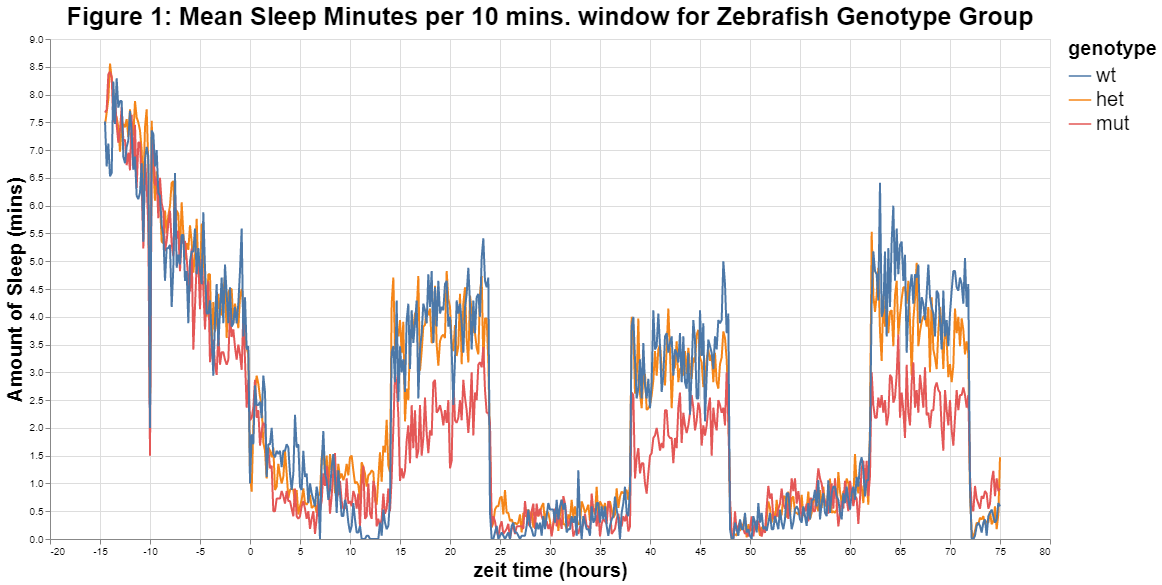

In [11]:
# Plot the average sleep minutes for each genotype
alt.Chart(averaged_df_sleep, 
          title = 'Figure 1: Mean Sleep Minutes per 10 mins. window for Zebrafish Genotype Group'
         ).mark_line(
            strokeJoin = 'bevel'
        ).encode(
            x=alt.X('zeit:Q', title = 'zeit time (hours)'),
            y=alt.Y('sleep-mins:Q', title = 'Amount of Sleep (mins)'),
            color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
            order = 'zeit:Q'
        ).properties(
            height = 500,
            width = 1000
        ).configure_title(
            fontSize = 25
        ).configure_axis(
            titleFontSize = 20
).configure_legend(
            labelFontSize = 20,
            symbolSize = 500,
            titleFontSize = 20
)

    

# Analysis of Method 1 Graph: Sleep Minutes
Based on viewing the average sleep minutes from each genotype group, there are regular periods of relatively high sleep-minutes when the light is turned on for all three groups, as compared to periods of very low sleep-minutes when the white lights are activated (as expected). Comparing the groups during light-off periods, we can see the blue-colored wild-type (aana2+/+) and the orange-colored heterogenous (aana2+/-) both have very similar levels of sleep-minute, with the orange-colored genotype with slightly less sleep minutes during the 3rd sleep period. However, the mutant red-colored (aanat2-/-) group has consistently lower levels of sleep-minutes per 10-minute interval compared to the other 2 groups. We can conclude that the complete loss of aanat2 is associated with a reduction in sleep that zebrafish larva gain at night.

However, loss of aana2t does not appear to have any affect on sleep during daytime hours.

# Second Method: Sleep Latency
Another method of parameterizing is sleep latency, the time it takes for the zebrafish larvae to enter a sleep state. In contrast to measuring the proportion of time a larva stays asleep compared to its awake time, sleep latency measures how long it takes to go to sleep. This can be measured by how long it takes for sleep to begin upon receiving triggering stimuli (lights out). Our definition of a sleep state is when a fish has displayed no movement for at least 1 minute.

In [12]:
#  isolating the times in the data set right after lights out (23:00:00) up to 4 hours after lights out
df_latent = df.loc[ (df['time'].dt.time >= pd.to_datetime('23:00:00').time()) | (df['time'].dt.time < pd.to_datetime('3:00:00').time())]

df_latent.index = pd.RangeIndex(len(df_latent.index))

df_latent.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light,asleep
0,1,4.8,2013-03-15 23:00:09,-9.997500,-600,4,het,False,False
1,1,2.4,2013-03-15 23:01:09,-9.980833,-599,4,het,False,False
2,1,1.3,2013-03-15 23:02:09,-9.964167,-598,4,het,False,False
3,1,0.9,2013-03-15 23:03:09,-9.947500,-597,4,het,False,False
4,1,0.0,2013-03-15 23:04:09,-9.930833,-596,4,het,False,True


In [13]:
# Isolate datapoints within the 1st minute right after lights out at 23:00:00
df_lights_out = df_latent.loc[ (df_latent['time'].dt.time >= pd.to_datetime('23:00:00').time()) &
                              (df_latent['time'].dt.time < pd.to_datetime('23:01:00').time()) ]

# Save the index of lights-out datapoints in list for the next "for" loop
lightsout = df_lights_out.index

In [14]:
# First, declare a blank list
lst = []

# Next, create a "for" loop to fill the list
for i in lightsout:
    j = 0
    while (df_latent['asleep'][i+j] == False) & (j < 240): #up to the 4 hour mark
        j += 1
        
    lst.append({'location':df_lights_out['location'][i],
                    'lights-out time':df_lights_out['time'][i],
                    'genotype':df_lights_out['genotype'][i],
                    'latency(min)':j
                   })
        
latency_list = pd.DataFrame(lst)

latency_list.head()

,genotype,latency(min),lights-out time,location
0,het,4,2013-03-15 23:00:09,1
1,het,21,2013-03-16 23:00:40,1
2,het,6,2013-03-17 23:00:40,1
3,het,22,2013-03-18 23:00:29,1
4,wt,6,2013-03-15 23:00:09,2


In [15]:
# find the mean sleep latency within each group for some extra, at-a-glance information
averaged_latency = latency_list.groupby(['genotype']).mean().reset_index()

# Delete location column
del averaged_latency['location']


# Display the mean latency of each genotype group
averaged_latency

,genotype,latency(min)
0,het,10.536765
1,mut,27.602273
2,wt,11.102941


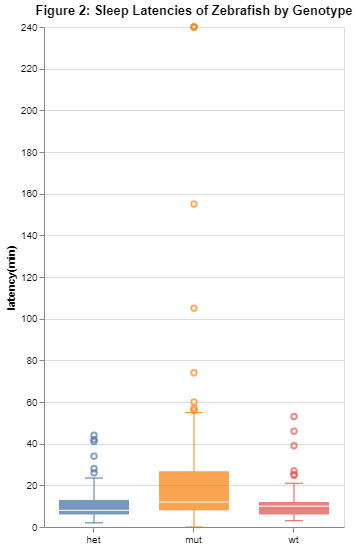

In [16]:
# Whisker Plot
altcat.catplot(data=latency_list,
               title = 'Figure 2: Sleep Latencies of Zebrafish by Genotype',
               height = 500,
               width = 300,
              encoding=dict(x=alt.X('genotype:N', title = None),
                           y = 'latency(min):Q',
                           color = alt.Color('genotype:N', legend = None)),
              transform='box'
              ).configure_bar(
                    fillOpacity=0.75
            ).configure_axisX(
                labelAngle=0
)

# Notable Data Issues

As shown in the graph, there are notable issues with fish appearing at the maximum latency of 240 minutes. Verifying the data shows that these points come from fish 21 and fish 67. Due to abnormal sickness-caused behavior with these fish, these data points can be considered outliers and removed from the data. 
We will make a new plot excluding these fish.

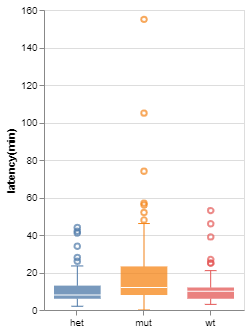

In [17]:
# Drop the outlier fish 21 and 67
latency_list = latency_list.loc[(latency_list['location'] != 21) & (latency_list['location'] != 67)]


# Plot a new box plot!

# Whisker Plot
altcat.catplot(data=latency_list,
              encoding=dict(x=alt.X('genotype:N', title = None),
                           y = 'latency(min):Q',
                           color = alt.Color('genotype:N', legend = None)),
              transform='box'
              ).configure_bar(
                    fillOpacity=0.75
            ).configure_axisX(
                labelAngle=0,
)

#### Method 2 Analysis: Sleep Latency
As displayed from both the mean sleep latency of each genotype and the box plot displaying all sleep latency data points within each genotype group, it generally takes about 10-20 minutes for most zebrafish larvae to enter their first sleep stage after the lights are turned off. 
Comparing the genotypes directly with one another through the box plot, it is visibly shown that the wild and heterogenous genotype groups contain very similar means and standard deviations in sleep latency. In contrast, the mutant genotype group has a higher mean sleep latency, as well as significantly wider standard deviation and range of values. When removing the two outlier fish, the longest sleep latency was nearly 160 minutes once the lights went out, much higher as compared to the highest sleep latencies as the other two genotypes.

From these parametrizations, we can see that the total loss of anaat2 is associated with an increased and less stable sleep latency as compared to both heterogenous and wild type genotype groups. Therefore, we can make the connection taht the loss of anaat2 has some negative effects on the zebrafish larvae's abiliy to fall asleep upon introducing a sleep-inducing stimuli (lights-out).

In [18]:
%load_ext watermark

In [19]:
%watermark -v -p numpy,pandas,altair,altair_catplot,jupyterlab

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
altair 3.2.0
altair_catplot 0.0.5
jupyterlab 1.0.2


## Contribution Block

Together, we both analyzed the research papers, decided on our desired sleep behavior methodology of parametrizing sleep behavior, and 

Kevin Low formatted the charts, check the file for errors, and contributed to the coding process of performing method 2.

Jethro Lim performed the data tidying, headed the data translation from movement activity to sleep minutes for method 1, and wrote the markdown cells.